In [0]:
!git clone https://github.com/dtylor/WalkRNN.git
%cd WalkRNN
!ls

Cloning into 'WalkRNN'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 422 (delta 43), reused 26 (delta 7), pack-reused 326
Receiving objects: 100% (422/422), 2.87 MiB | 8.65 MiB/s, done.
Resolving deltas: 100% (223/223), done.
/content/WalkRNN/WalkRNN
Demonstration.ipynb  LICENSE-3RD-PARTY.txt  MUTAG.ipynb     test.py
examples	     LICENSE.md		    n2v		    TODO
graphwave	     module.py		    OrgChart.ipynb  utilities.py
__init__.py	     Motivation.ipynb	    README.md


In [0]:
 !curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0   1603      0 --:--:-- --:--:-- --:--:--  1603
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'


In [0]:
import fastai
import pandas as pd

In [0]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.6.8
fastai        : 1.0.57
fastprogress  : 0.1.21
torch         : 1.2.0
nvidia driver : 418.67
torch cuda    : 10.0.130 / is available
torch cudnn   : 7602 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Aug 8 02:47:02 PDT 2019
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
../
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re-r

In [0]:
str(fastai.__dict__['version'])
!more /usr/local/lib/python3.6/dist-packages/fastai/version.py

__all__ = ['__version__']
__version__ = '1.0.57'


In [0]:
!ls

Demonstration.ipynb  LICENSE-3RD-PARTY.txt  MUTAG.ipynb     test.py
examples	     LICENSE.md		    n2v		    TODO
graphwave	     module.py		    OrgChart.ipynb  utilities.py
__init__.py	     Motivation.ipynb	    README.md


In [0]:
from google.colab import drive

In [0]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from utilities import load_graph_kernel_graph, load_graph_kernel_labels, transform_graph


Gkern = load_graph_kernel_graph("./examples/data/IMDB-BINARY")
y = load_graph_kernel_labels("./examples/data/IMDB-BINARY")


DONE


In [0]:
Gkern.nodes[12]

{'component': 1}

In [0]:
#Transform networkx property graph into a format prepared for WalkRNN
G, current_vocab_size = transform_graph(Gkern, params={'num_kmeans_clusters': 4, "num_pca_components": 6, "num_batch":500, 'num_att_kmeans_clusters': 10})

finished graphwave_alg batches


In [0]:
G.nodes[12]

{'component': 1, 'structure': 3}

In [0]:
import matplotlib.pyplot as plt
import networkx as nx
# create number for each group to allow use of colormap
from itertools import count


def plotGW(tmpG, comp_no):
 # get unique groups
 groups = set(nx.get_node_attributes(tmpG,'structure').values())

 mapping = dict(zip(sorted(groups),count()))
  
 comp_nodes = [x for x,y in tmpG.nodes(data=True) if y['component']==comp_no]
 print(len(comp_nodes))
 subgraph = tmpG.subgraph(comp_nodes)
 nodes = subgraph.nodes()
 colors = [mapping[subgraph.node[n]['structure']] for n in nodes]

 # drawing nodes and edges separately so we can capture collection for colobar
 pos = nx.spring_layout(subgraph)
 ec = nx.draw_networkx_edges(subgraph, pos, with_labels=True,alpha=0.2)
 nc = nx.draw_networkx_nodes(subgraph, pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, node_size=100, cmap=plt.cm.jet, vmin=0,vmax=3)
 plt.colorbar(nc)
 plt.axis('off')
 plt.show()
 print(nx.get_node_attributes(subgraph,'structure'))
 

20


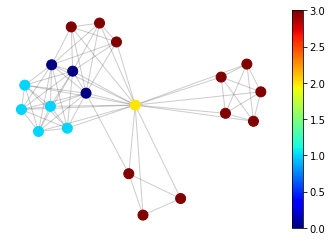

{1: 3, 2: 1, 3: 2, 4: 3, 5: 3, 6: 3, 7: 0, 8: 3, 9: 1, 10: 3, 11: 3, 12: 3, 13: 0, 14: 3, 15: 1, 16: 3, 17: 3, 18: 1, 19: 1, 20: 0}


In [0]:

plotGW(G,1)

32


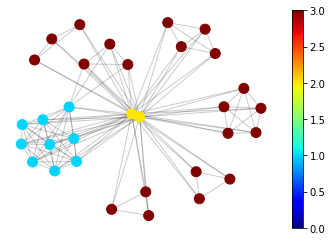

{21: 3, 22: 3, 23: 3, 24: 1, 25: 1, 26: 1, 27: 3, 28: 3, 29: 3, 30: 3, 31: 3, 32: 3, 33: 3, 34: 1, 35: 2, 36: 3, 37: 3, 38: 3, 39: 3, 40: 3, 41: 1, 42: 1, 43: 3, 44: 2, 45: 3, 46: 3, 47: 1, 48: 3, 49: 1, 50: 1, 51: 3, 52: 3}


In [0]:
plotGW(G,2)

21


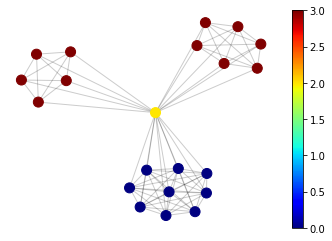

{53: 0, 54: 3, 55: 2, 56: 0, 57: 3, 58: 0, 59: 0, 60: 0, 61: 3, 62: 3, 63: 3, 64: 0, 65: 0, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 0, 73: 0}


In [0]:
plotGW(G,3)

14


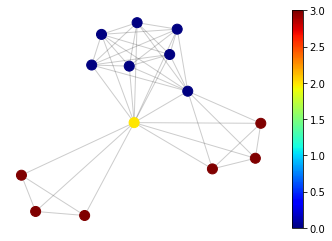

{3008: 0, 3009: 3, 3010: 3, 3011: 0, 3012: 0, 3013: 0, 3014: 2, 3015: 3, 3016: 0, 3017: 0, 3018: 3, 3019: 3, 3020: 3, 3007: 0}


In [0]:
plotGW(G,151)

12


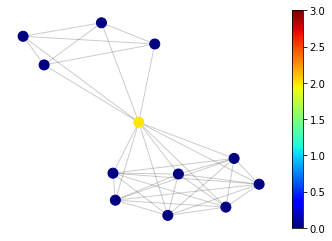

{243: 0, 244: 0, 245: 0, 246: 0, 247: 0, 248: 0, 249: 0, 250: 0, 251: 2, 252: 0, 253: 0, 254: 0}


In [0]:
plotGW(G,11)

15


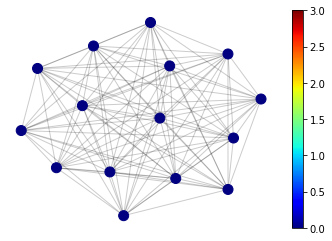

{3185: 0, 3186: 0, 3187: 0, 3188: 0, 3189: 0, 3190: 0, 3191: 0, 3192: 0, 3193: 0, 3194: 0, 3195: 0, 3196: 0, 3197: 0, 3198: 0, 3199: 0}


In [0]:
plotGW(G,160)

12


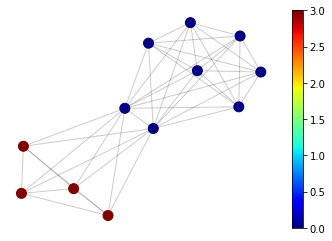

{418: 0, 419: 0, 420: 3, 421: 0, 422: 3, 423: 3, 424: 0, 425: 3, 426: 0, 427: 0, 428: 0, 429: 0}


In [0]:
plotGW(G,18)

17


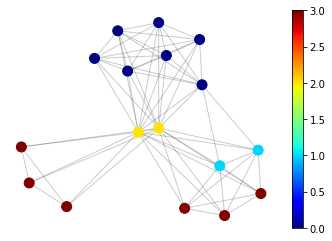

{2816: 0, 2817: 1, 2818: 1, 2819: 3, 2820: 3, 2821: 0, 2822: 2, 2823: 3, 2824: 3, 2825: 2, 2826: 3, 2810: 0, 2811: 0, 2812: 0, 2813: 3, 2814: 0, 2815: 0}


In [0]:
plotGW(G,140)

In [0]:
from module import walk_as_string

In [0]:
walks = walk_as_string(G, componentLabels = y)

Walk iteration:
('1', '/', '20')
('2', '/', '20')
('3', '/', '20')
('4', '/', '20')
('5', '/', '20')
('6', '/', '20')
('7', '/', '20')
('8', '/', '20')
('9', '/', '20')
('10', '/', '20')
('11', '/', '20')
('12', '/', '20')
('13', '/', '20')
('14', '/', '20')
('15', '/', '20')
('16', '/', '20')
('17', '/', '20')
('18', '/', '20')
('19', '/', '20')
('20', '/', '20')


/content/WalkRNN/module.py:140: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sorted_walks = pd.DataFrame(walks).sort_values(0).as_matrix()


[ 1  6 10  6 11  3 15 20  4 13 15 18 20  4 13 20 18 19 15 13  7  4 17  4 17 12  7  9 18 20]
[ 1  3  7  9 13  2 13  7 20  9  7 13  2 18  7  3  1  6  5 11 10  3  4  7 13 15 19  9 18  7]
[ 1  3 19 18 19  2 13 12  7  3  9  3 18  9  2 15  7 15 13 18 15 19  9 19  3  4 13 18 15 13]


In [0]:
from fastai.text import *
from sklearn.model_selection import train_test_split
import numpy

In [0]:
walks.head()

,walk,label,start_node,component
0,3 3 3 3 3 2 1 0 3 0 1 1 0 3 0 0...,0,1,1
1,3 2 0 1 0 1 0 0 0 1 0 0 1 1 0 2...,0,1,1
2,3 2 1 1 1 1 0 3 0 2 1 2 1 1 1 1...,0,1,1
3,3 3 2 3 3 3 2 1 2 3 3 2 1 0 3 3...,0,1,1
4,3 3 2 1 0 3 2 0 3 3 0 1 1 1 0 1...,0,1,1


In [0]:
walks.shape

(395460, 4)

In [0]:
from sklearn.model_selection import train_test_split
import numpy
data = list(set(walks.component))
x_traina ,x_test = train_test_split(data,test_size=0.1)    
x_train ,x_val = train_test_split(x_traina,test_size=0.2)  


In [0]:
train_tmp = pd.DataFrame(x_train)
train_tmp.columns = ['component']
df_train = pd.merge(walks, train_tmp, on='component', sort=False)
df_train.shape

(284180, 4)

In [0]:
test_tmp = pd.DataFrame(x_test)
test_tmp.columns = ['component']
df_test = pd.merge(walks, test_tmp, on='component', sort=False)
df_test.shape

(38600, 4)

In [0]:
val_tmp = pd.DataFrame(x_val)
val_tmp.columns = ['component']
df_val = pd.merge(walks, val_tmp, on='component', sort=False)
df_val.shape

(72680, 4)

In [0]:
!mkdir result
mypath = './result'

In [0]:
data_lm = TextLMDataBunch.from_df(train_df=df_train[['walk', 'label']], valid_df=df_val[[
                                  'walk', 'label']],  path=mypath, text_cols='walk', label_cols='label')


In [0]:
data_lm.save('data_lm.pkl')

In [0]:
!ls -l ./result

total 118740
-rw-r--r-- 1 root root 121589096 Sep 30 21:45 data_lm.pkl


In [0]:
bs = 32
# load the data (can be used in the future as well to prevent reprocessing)
data_lm = load_data(mypath, 'data_lm.pkl', bs=bs)


In [0]:
data_lm.show_batch() # take a look at the batch fed into the GPU

idx,text
0,0 1 0 xxwrep 5 1 2 3 0 1 1 0 xxbos 3 3 2 3 3 3 2 1 2 3 3 2 1 0 3 3 0 1 0 1 1 0 1 1 1 2 3 2 3 0 xxbos 3 3 2 1 0 3 2 0 3 3 0 1 1 1 0 1 0 3 3 0 1 0 3 2 3 3
1,xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0 xxbos xxwrep 29 0 0
2,0 0 1 2 3 3 1 2 3 0 1 0 0 0 1 3 xxbos xxwrep 4 3 2 0 1 1 0 1 0 0 2 0 1 1 0 1 3 0 2 1 0 1 0 0 0 1 1 0 xxbos xxwrep 6 3 2 3 3 1 2 xxwrep 7 3 2 3 3 3 2 1 0 1 0 0 0 2
3,2 xxwrep 4 3 2 xxwrep 10 3 2 xxwrep 5 1 2 3 2 3 2 3 xxbos xxwrep 5 3 2 3 2 xxwrep 6 3 2 xxwrep 6 3 2 xxwrep 7 1 1 xxbos 3 3 3 2 3 3 2 xxwrep 10 3 2 1 3 3 3 1 3 3 2 3 2 3 3 xxbos 3 3 3 2 3 1 2 xxwrep
4,3 3 1 3 1 2 1 3 3 3 xxbos 3 2 1 3 3 1 3 3 xxwrep 6 1 3 3 1 3 1 1 3 1 3 2 xxwrep 5 1 3 xxbos 3 1 3 3 2 1 3 1 3 3 3 xxwrep 12 1 3 2 3 3 2 1 3 xxbos 3 2 3 3 3 1 1 3 2 xxwrep 6


In [0]:
awd_lstm_lm_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.1, hidden_p=0.15, input_p=0.25, embed_p=0.02, weight_p=0.2, tie_weights=True, out_bias=True)
awd_lstm_clas_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.4,  hidden_p=0.3, input_p=0.4, embed_p=0.05, weight_p=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,1.110198,1.072808,0.554394,01:23


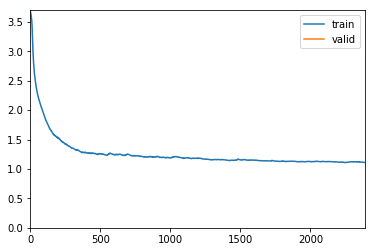

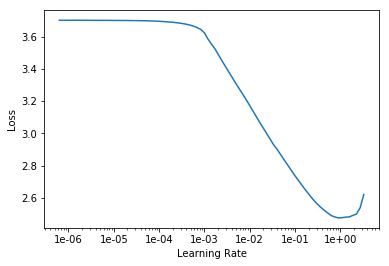

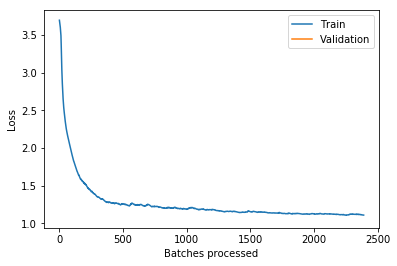

In [0]:

learn = language_model_learner(data_lm,arch=AWD_LSTM,config= awd_lstm_lm_config,drop_mult=1.9, callback_fns=ShowGraph,pretrained=False)
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.recorder.plot_losses()
learn.save('fit-head')



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


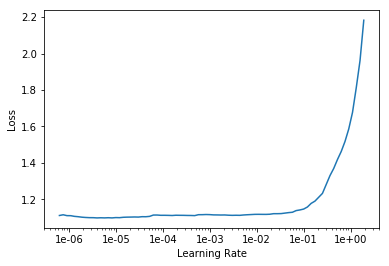

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.130570,1.078122,0.552499,01:22
1,1.121426,1.084018,0.543229,01:21
2,1.105719,1.078315,0.547379,01:22
3,1.091431,1.052374,0.561015,01:22
4,1.070814,1.035715,0.563487,01:22
5,1.071661,1.027964,0.569084,01:22


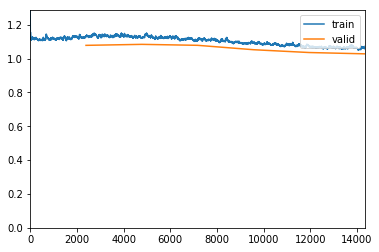

In [0]:
learn.fit_one_cycle(6, .01, moms=(0.8,0.7))

In [0]:
learn.save('fit-head')

In [0]:
learn.save_encoder('fine_tuned_enc3')

In [0]:
df = walks.sample(frac=1).reset_index(drop=True)
df['index1']=df.index

g = df.groupby('component')
df['RN'] = g['index1'].rank(method='min')

df[df['component']==1].head()


,walk,label,start_node,component,index1,RN
359,1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1...,0,19,1,359,1.0
3372,0 3 2 1 1 2 0 3 2 1 1 0 1 1 1 1...,0,20,1,3372,2.0
4512,0 1 0 1 1 0 1 0 0 2 3 2 1 0 1 2...,0,13,1,4512,3.0
5249,3 3 0 3 0 1 0 1 1 0 0 3 0 0 3 0...,0,8,1,5249,4.0
9662,3 0 0 2 3 3 3 2 3 0 1 0 1 0 3 0...,0,4,1,9662,5.0


Choose a path per node and concatenate for entire component

In [0]:
df.groupby('component')['walk'].apply(lambda x: ', '.join(x))

def f(x):
     return Series(dict(label = x['label'].min(), text =  ', '.join(x['walk'])))
df_text_comp = df[(df['RN']<=9.0)].groupby('component').apply(f)
df_text_comp.head()

,label,text
component,,
1,0,1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1...
2,0,3 2 3 3 2 1 1 1 1 2 1 1 1 1 1 1...
3,0,0 0 0 0 0 0 0 0 0 2 0 0 2 3 3 2...
4,0,3 1 3 1 1 3 2 1 3 3 3 2 3 3 2 3...
5,0,3 3 3 3 0 0 0 0 0 0 0 0 0 0 3 3...


In [0]:
df_text_comp['component']= df_text_comp.index
df_text_comp.index.names = ['comp']
df_text_comp.head()

,label,text,component
comp,,,
1,0,1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1...,1
2,0,3 2 3 3 2 1 1 1 1 2 1 1 1 1 1 1...,2
3,0,0 0 0 0 0 0 0 0 0 2 0 0 2 3 3 2...,3
4,0,3 1 3 1 1 3 2 1 3 3 3 2 3 3 2 3...,4
5,0,3 3 3 3 0 0 0 0 0 0 0 0 0 0 3 3...,5


In [0]:
train = pd.merge(df_text_comp, train_tmp, on='component', sort=False)
test =  pd.merge(df_text_comp, test_tmp, on='component', sort=False)
val =  pd.merge(df_text_comp, val_tmp, on='component', sort=False)
(train.shape,val.shape, test.shape, train.shape[0]/df_text_comp.shape[0])

((720, 3), (180, 3), (100, 3), 0.72)

In [0]:
bs=32#48

data_clas = TextClasDataBunch.from_df(train_df=train[['text','label']],valid_df=val[['text','label']],  path=mypath, text_cols='text',label_cols = 'label', vocab=data_lm.vocab)


In [0]:
data_clas.save('tmp_clas')

In [0]:
data_clas = load_data(mypath, 'tmp_clas', bs=bs)


In [0]:
data_clas.show_batch()

text,target
xxbos 3 3 1 1 3 1 1 3 1 1 1 0 1 0 1 0 1 0 1 3 3 1 1 3 1 3 3 0 1 3 xxunk 0 1 1 2 1 1 2 1 1 2 xxwrep 5 1 3 1 3 1 0 1 1 0 2 1 1 1 2 1 2 xxunk 1 1 1 3 1 3 1 1 0,1
xxbos 1 1 3 1 3 1 2 3 1 3 2 3 3 1 2 3 2 3 3 3 1 1 3 1 3 1 3 3 1 3 xxunk 3 2 3 3 1 3 3 1 xxwrep 5 3 1 3 3 1 3 2 3 3 2 xxwrep 4 3 1 2 3 1 xxunk 3 1 2 3 1 1 3 2 3 2,0
xxbos 3 1 3 1 1 3 3 3 1 3 3 1 1 1 2 3 3 1 3 3 2 3 1 3 1 3 2 1 1 1 xxunk 3 3 2 2 3 3 2 3 1 3 3 1 xxwrep 4 3 1 3 2 xxwrep 5 3 1 3 3 3 1 3 xxunk 3 1 3 2 xxwrep 4 3 2 3 3,0
xxbos 3 0 0 3 3 3 0 3 0 0 0 3 3 3 0 1 1 0 0 3 0 3 0 0 0 3 3 0 3 0 xxunk 1 0 3 0 3 3 3 0 0 1 0 1 0 0 0 3 0 3 0 1 xxwrep 4 0 3 3 1 1 1 0 xxunk 3 3 0 3 0 0 0 1,0
xxbos 2 1 1 0 1 0 1 1 3 1 3 1 1 2 3 3 2 3 2 0 2 3 0 3 0 1 0 1 1 1 xxunk 3 1 1 0 3 2 0 3 0 1 0 1 0 2 3 3 2 3 2 3 0 0 1 1 xxwrep 4 0 1 2 xxunk 0 3 2 1 1 1 0 0,0


In [0]:
learn = text_classifier_learner(data_clas,arch=AWD_LSTM,config = awd_lstm_clas_config, drop_mult=2.0,pretrained=False)
learn.load_encoder('fine_tuned_enc3')
learn.freeze()

In [0]:
gc.collect();

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


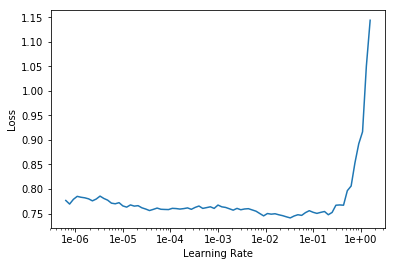

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.793015,0.667901,0.627778,00:01


In [0]:
def predict(test,learn):
  predictions=[]
  for index, row in test.iterrows():
    p=learn.predict(row['text'])
    #print((row['label'],str(p[0])))
    predictions.append((row['text'],str(row['label']),str(p[0])))
  dfpred = pd.DataFrame(predictions)
  dfpred.columns=['text','label','prediction']
  match=dfpred[(dfpred['label']==dfpred['prediction'])]
  #match.head()
  print((dfpred.shape[0], match.shape[0],match.shape[0]/dfpred.shape[0]))

In [0]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.711031,0.658412,0.627778,00:01


In [0]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(5e-3/(2.6**4),5e-03), moms=(0.8,0.7))



epoch,train_loss,valid_loss,accuracy,time
0,0.702425,0.645166,0.622222,00:02
1,0.693483,0.632905,0.622222,00:02
2,0.679089,0.620984,0.627778,00:02
3,0.660886,0.676979,0.555556,00:02
4,0.660224,0.659712,0.555556,00:02
5,0.649553,0.652349,0.561111,00:02
6,0.641957,0.635968,0.566667,00:02
7,0.632489,0.624294,0.605556,00:02


In [0]:
predict(test,learn)

(100, 68, 0.68)


In [0]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.644399,0.646089,0.550000,00:02
1,0.652948,0.684375,0.516667,00:02
2,0.654645,0.627151,0.605556,00:02
3,0.647806,0.637093,0.583333,00:03
4,0.642150,0.628102,0.572222,00:02
5,0.641997,0.638728,0.588889,00:02
6,0.647338,0.678676,0.555556,00:02
7,0.646619,0.678303,0.505556,00:02
8,0.639442,0.647952,0.577778,00:02
9,0.634890,0.658796,0.522222,00:02


In [0]:
predict(test,learn)

(100, 64, 0.64)


In [0]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.624457,0.681608,0.516667,00:02
1,0.624883,0.675728,0.538889,00:02
2,0.620675,0.652854,0.583333,00:02
3,0.622193,0.637452,0.577778,00:02
4,0.630909,0.672764,0.516667,00:02
5,0.630529,0.685286,0.544444,00:02
6,0.622058,0.636966,0.594444,00:02
7,0.613850,0.619169,0.616667,00:02
8,0.620335,0.635904,0.588889,00:02
9,0.618726,0.624474,0.600000,00:02


In [0]:
predict(test,learn)

(100, 68, 0.68)


In [0]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.614341,0.615103,0.650000,00:02
1,0.611924,0.620915,0.633333,00:02
2,0.605283,0.604273,0.666667,00:02
3,0.603028,0.699527,0.616667,00:02
4,0.606755,0.604268,0.694444,00:02
5,0.602433,0.615652,0.661111,00:02
6,0.609722,0.625225,0.650000,00:02
7,0.611891,0.623654,0.605556,00:02
8,0.612775,0.638333,0.544444,00:02
9,0.611398,0.643231,0.555556,00:02


In [0]:
predict(test,learn)

(100, 68, 0.68)


In [0]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.592590,0.601370,0.661111,00:03
1,0.597188,0.649562,0.555556,00:02
2,0.589534,0.619764,0.655556,00:02
3,0.599874,0.624596,0.588889,00:02
4,0.602120,0.614644,0.605556,00:02
5,0.603796,0.631555,0.655556,00:02
6,0.600083,0.639931,0.633333,00:02
7,0.610045,0.637710,0.627778,00:02
8,0.603824,0.653783,0.616667,00:02
9,0.600265,0.606302,0.677778,00:02


In [0]:
predict(test,learn)

(100, 67, 0.67)


In [0]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.588658,0.638752,0.627778,00:02
1,0.578407,0.656180,0.600000,00:02
2,0.586030,0.614343,0.677778,00:02
3,0.589267,0.618876,0.705556,00:02
4,0.593548,0.664771,0.611111,00:02
5,0.598017,0.654694,0.572222,00:02
6,0.603855,0.655077,0.594444,00:02
7,0.603855,0.688907,0.561111,00:02
8,0.594923,0.634538,0.638889,00:02
9,0.589462,0.672330,0.594444,00:02


In [0]:
predict(test,learn)

(100, 68, 0.68)


In [0]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.561708,0.624031,0.655556,00:03
1,0.577097,0.636894,0.666667,00:02
2,0.582124,0.608195,0.666667,00:02
3,0.580827,0.615066,0.650000,00:02
4,0.588348,0.600223,0.700000,00:02
5,0.591890,0.622062,0.666667,00:02
6,0.591249,0.624468,0.633333,00:02
7,0.593311,0.596799,0.694444,00:02
8,0.584529,0.605807,0.655556,00:02
9,0.575001,0.620716,0.644444,00:02


In [0]:
predict(test,learn)

(100, 67, 0.67)


In [0]:
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(40, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(40, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.8, inplace=False)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace=True)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1, inplace=False)
      (6): Linear(in_features=50, out_features=2, bias=True)
    )
  )
)